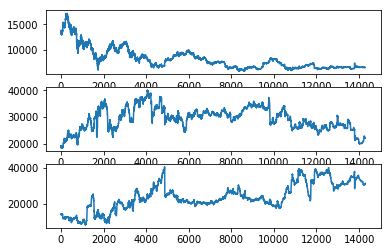

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
def search_by_ts(ts_list):
    df_b = pd.read_csv("bitfinex_BTCUSD_1499503811000_1540938106535.csv")
    df_b = df_b[["TS","price"]]
    df_b = df_b[df_b["TS"]>=ts_list[0]*1000]
    df_b = df_b[df_b["TS"]<=ts_list[-1]*1000]
    tt_list = df_b.TS.values.tolist()
    p_list = df_b.price.values.tolist()
    
    i = 0
    m = len(tt_list)-1
    price_list = []
    for ts in ts_list:
        while(tt_list[i]<ts*1000 and i<m):
            i=i+1
        price_list.append(round(p_list[i]))
    return price_list

df_l =pd.read_csv('BTCLONG_01.csv')
l_list = df_l.long.values.tolist()
df_s =pd.read_csv('BTCSHORT_01.csv')
s_list = df_s.short.values.tolist()
# print(len(df_l))
# print(len(df_s))
ts_list = df_l.TS.values.tolist()
price_list = search_by_ts(ts_list)
# df['price'] = price_list

plt.subplot(3,1,1)
plt.plot(price_list)
plt.subplot(3,1,2)
plt.plot(l_list)
plt.subplot(3,1,3)
plt.plot(s_list)

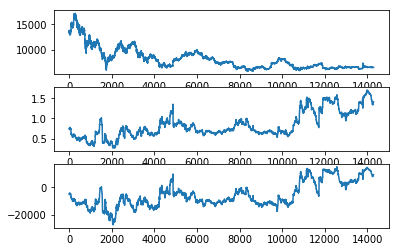

In [2]:
df_l =pd.read_csv('BTCLONG_01.csv')
l_list = df_l.long.values.tolist()
df_s =pd.read_csv('BTCSHORT_01.csv')
s_list = df_s.short.values.tolist()
c_list = df_s.s_c.values.tolist()
df_l['short'] = s_list
df_l['s_c'] = c_list
df_l['price'] = price_list
ratio_list = []
sum_list = []
for idx, s in enumerate(s_list):
    ratio_list.append(s/l_list[idx])
    sum_list.append(s-l_list[idx])
df_l['short/long'] = ratio_list
df_l['short-long'] = sum_list
df_l.to_csv('BTCSHORTLONG_01.csv',index=False)

plt.subplot(3,1,1)
plt.plot(price_list)
plt.subplot(3,1,2)
plt.plot(ratio_list)
plt.subplot(3,1,3)
plt.plot(sum_list)